# Hands-on Week 5

**Wednesday 12/03/2025**

## Exploratory Data Analysis

In [1]:
import pandas as pd

url = 'https://github.com/lpoly/public_data/raw/main/Titanic-Dataset.csv'
titanic_df = pd.read_csv(url)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Summary Statistics
Conducting EDA helps in understanding the data distribution, identifying missing values, and uncovering patterns.

In [2]:
# Summary statistics
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- **Survived**: Indicates if the passenger survived (1) or not (0).
- **Pclass**: Passenger's class (1 = 1st, 2 = 2nd, 3 = 3rd).​
- **Name**: Passenger's full name.​
- **Sex**: Gender of the passenger.​
- **Age**: Age of the passenger in years.​
- **SibSp**: Number of siblings or spouses aboard the Titanic.​
- **Parch**: Number of parents or children aboard the Titanic.​
Datrics Wiki+1cloudxlab.com+1
- **Ticket**: Ticket number.​
cloudxlab.com+1Datrics Wiki+1
- **Fare**: Amount of money paid for the ticket.​
- **Cabin**: Cabin number.​
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

### Handling Missing Values

In [3]:
# Check for missing values
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Common strategies include:

- Age: Impute missing values with the median or mean age.​

In [4]:
# Impute missing 'Age' values with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.isnull().sum()

<ipython-input-4-451c4f833d76>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


- Cabin: Due to many missing entries, consider dropping this feature or creating a new feature indicating the presence or absence of a cabin number.​

In [5]:
titanic_df.drop(columns=['Cabin'], inplace=True)
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


- Embarked: Impute with the most frequent port of embarkation.

In [6]:
most_frequent_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(most_frequent_embarked, inplace=True)
titanic_df.isnull().sum()

<ipython-input-6-4c20f7b7b93f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna(most_frequent_embarked, inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Types of Variables in Data Science

In data analysis, variables can be categorized into **qualitative (categorical)** and **quantitative (numerical)** types.

#### 1. Qualitative (Categorical) Variables
These variables represent **categories or labels** rather than numerical values.

- **Nominal**: Categories with **no inherent order**.
  - Examples: Gender (Male, Female), Eye Color (Blue, Brown, Green)
- **Ordinal**: Categories with a **meaningful order**, but no fixed interval.
  - Examples: Education Level (High School, Bachelor’s, Master’s), Customer Satisfaction (Low, Medium, High)

#### 2. Quantitative (Numerical) Variables
These variables represent **measurable numerical values**.

- **Discrete**: Whole numbers; counts of occurrences.
  - Examples: Number of children in a family, Number of cars owned
- **Continuous**: Any numerical value within a range.
  - Examples: Height (cm), Temperature (°C), Weight (kg)

#### Summary Table

| Type            | Subtype   | Examples |
|----------------|----------|----------|
| **Categorical** | Nominal  | Gender, Eye Color |
| **Categorical** | Ordinal  | Education Level, Satisfaction Rating |
| **Numerical**   | Discrete | Number of Pets, Number of Cars |
| **Numerical**   | Continuous | Weight, Temperature |

### Choosing the Right Plot Based on Variable Type

When visualizing data, the choice of plot depends on whether the variable is **categorical** or **numerical**.

#### 1. Categorical Variables (Nominal & Ordinal)
Used for **grouping or counting categories**.

- **Bar Chart**: Displays frequency counts of categories.
  - *Example*: Number of passengers by class (Titanic dataset).
- **Pie Chart**: Shows proportions of categories.
  - *Example*: Distribution of male and female passengers.
- **Count Plot**: A variation of a bar chart showing raw counts.
  - *Example*: Number of survivors vs. non-survivors.

##### Example (Bar Chart in Python)


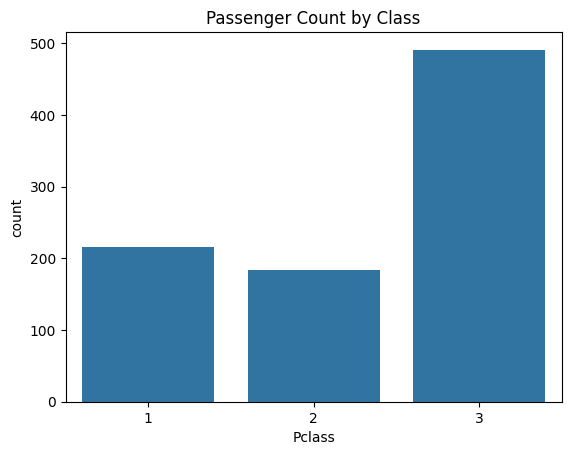

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Pclass', data=titanic_df)
plt.title('Passenger Count by Class')
plt.show()

#### 2. Numerical Variables (Discrete & Continuous)

Used for measuring and comparing values.

- Histogram: Shows the distribution of a single numerical variable.
    - Example: Age distribution of passengers.
- Box Plot: Displays the spread and outliers of a numerical variable.
    - Example: Fare prices for different passenger classes.
- Scatter Plot: Compares two numerical variables to identify relationships.
    - Example: Age vs. Fare to see pricing trends.

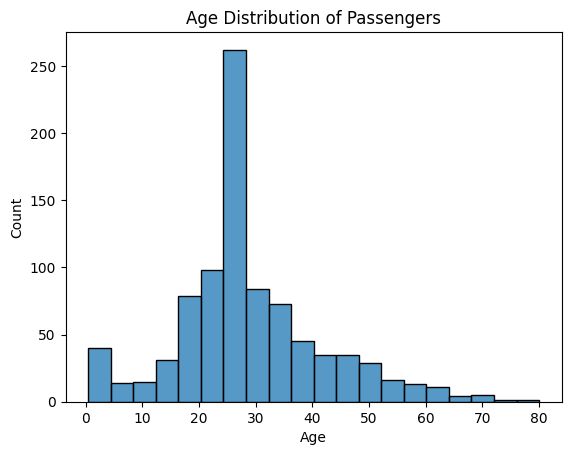

In [9]:
sns.histplot(titanic_df['Age'], bins=20)
plt.title('Age Distribution of Passengers')
plt.show()

Construction of a box plot is based around a dataset’s [quartiles](https://en.wikipedia.org/wiki/Quartile), or the values that divide the dataset into equal fourths. The first quartile (Q1) is greater than 25% of the data and less than the other 75%. The second quartile (Q2) sits in the middle, dividing the data in half. Q2 is also known as the median. The third quartile (Q3) is larger than 75% of the data, and smaller than the remaining 25%. In a box and whiskers plot, the ends of the box and its center line mark the locations of these three quartiles.

The distance between Q3 and Q1 is known as the interquartile range (IQR) and plays a major part in how long the whiskers extending from the box are. Each whisker extends to the furthest data point in each wing that is within 1.5 times the IQR. Any data point further than that distance is considered an outlier, and is marked with a dot.

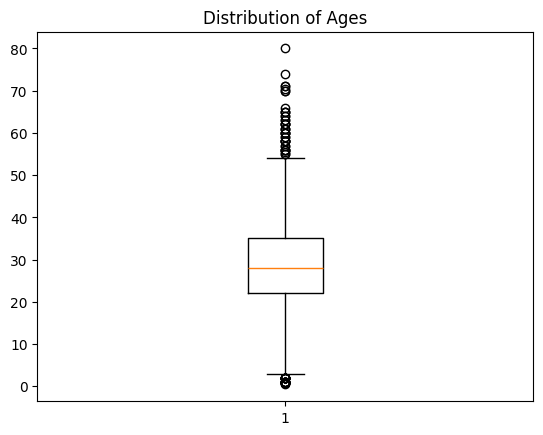

In [10]:
plt.boxplot(titanic_df['Age'])
plt.title('Distribution of Ages')
plt.show()

now let's plot the violin plot

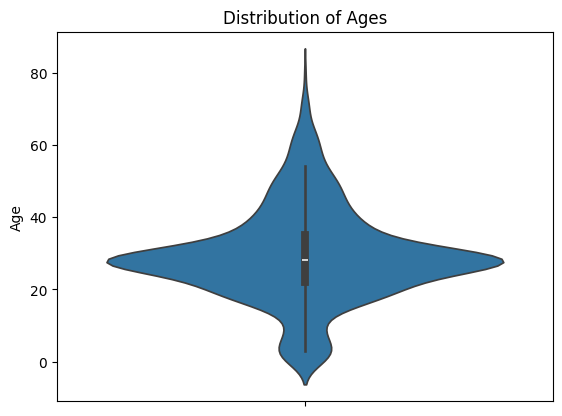

In [11]:
sns.violinplot(titanic_df['Age'])
plt.title('Distribution of Ages')
plt.show()

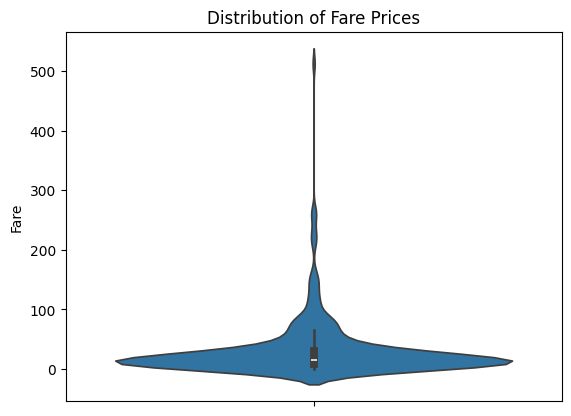

In [12]:
sns.violinplot(titanic_df['Fare'])
plt.title('Distribution of Fare Prices')
plt.show()

#### Scatter Plots: Visualizing Relationships Between Two Variables

A **scatter plot** is used to visualize the relationship between **two numerical variables**. Each point represents an observation, with:
- **X-axis**: One numerical variable
- **Y-axis**: Another numerical variable

##### When to Use Scatter Plots?
- To identify **patterns** or **trends** between variables.
- To detect **correlations** (positive, negative, or none).
- To spot **outliers** in the data.

###### Scatter Plot Example (Titanic Dataset)
###### Relationship Between Age and Fare



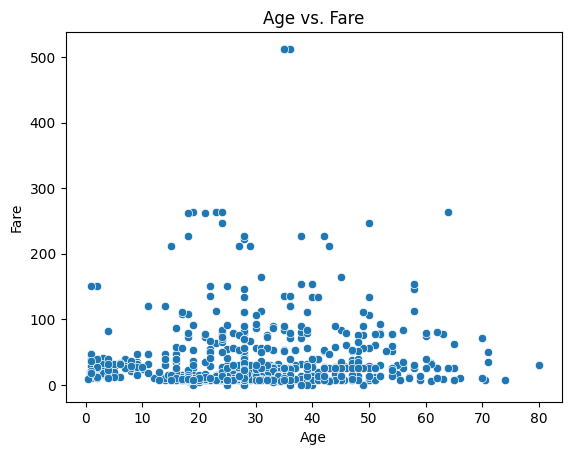

In [13]:
sns.scatterplot(x=titanic_df['Age'], y=titanic_df['Fare'])
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

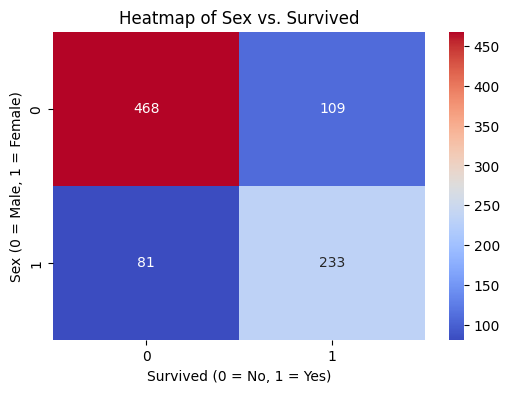

In [14]:
# Convert categorical variables to numerical for heatmap
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

# Create a pivot table for the heatmap
heatmap_data = titanic_df.pivot_table(index='Sex', columns='Survived', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Sex vs. Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Sex (0 = Male, 1 = Female)')
plt.show()

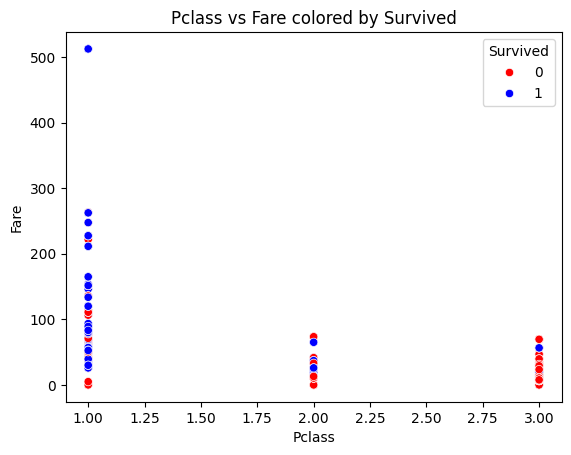

In [15]:
import matplotlib.pyplot as plt
sns.scatterplot(x='Pclass', y='Fare', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'blue'})
plt.title('Pclass vs Fare colored by Survived')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

## Feature Engineering

Feature Engineering is the process of creating new features or transforming existing features to improve the performance of a model.

- Family Size: Combine SibSp (siblings/spouses) and Parch (parents/children).

In [16]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

- Binning Age into Groups:

In [17]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels)

## Hypothesis Testing
We can test if there is an association between Age and Survival using an appropriate statistical hypothesis test.

In [18]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

age_survived = titanic_df[titanic_df['Survived'] == 1]['Age']
age_not_survived = titanic_df[titanic_df['Survived'] == 0]['Age']

# Check normality using Shapiro-Wilk test
stat1, p1 = shapiro(age_survived)
stat2, p2 = shapiro(age_not_survived)

print(f"Shapiro-Wilk Test for Age (Survived): p-value = {p1:}")
print(f"Shapiro-Wilk Test for Age (Not Survived): p-value = {p2:}")

Shapiro-Wilk Test for Age (Survived): p-value = 1.3014788207405857e-06
Shapiro-Wilk Test for Age (Not Survived): p-value = 3.684164160912423e-15


In [19]:
if p1 > 0.05 and p2 > 0.05:
    # If data is normal, perform t-test
    stat, p_value = ttest_ind(age_survived, age_not_survived)
    test_type = "t-test"
else:
    # If data is not normal, perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(age_survived, age_not_survived)
    test_type = "Mann-Whitney U test"

print(f"{test_type} results: p-value = {p_value:.4f}")

Mann-Whitney U test results: p-value = 0.2697


There is NO statistically significant difference in Age between survivors and non-survivors.


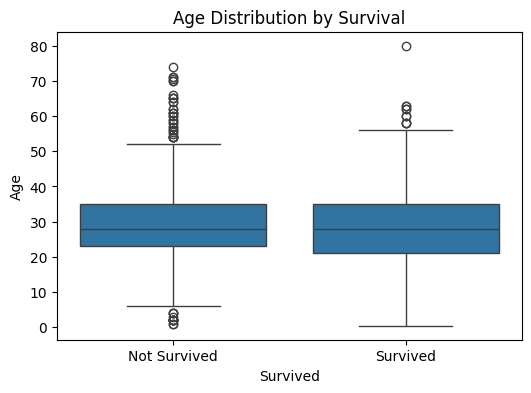

In [20]:
if p_value < 0.05:
    print("There is a statistically significant difference in Age between survivors and non-survivors.")
else:
    print("There is NO statistically significant difference in Age between survivors and non-survivors.")

# Boxplot visualization
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title('Age Distribution by Survival')
plt.show()

In statistics, different hypothesis tests are used depending on the type of variables involved. When dealing with categorical vs. categorical variables, such as Passenger Class (Pclass) and Survival, we use the Chi-Square test to determine if there is an association between them. Since Pclass is an ordinal categorical variable (1st, 2nd, 3rd class) and Survival is binary (0 = No, 1 = Yes), a Chi-Square test for independence helps assess whether ticket class significantly affects survival rates. If the p-value < 0.05, we conclude that ticket class is associated with survival, meaning higher-class passengers had better survival chances. However, if p > 0.05, we do not have strong statistical evidence for a relationship. Similarly, for numerical vs. categorical variables, like Age and Survival, we use tests such as the t-test or Mann-Whitney U test to check for differences in distributions across groups. Understanding which test to apply based on variable types is crucial for drawing meaningful insights from data.

Chi-Square Test results: p-value = 4.549251711298793e-23
There is a statistically significant association between Passenger Class and Survival.


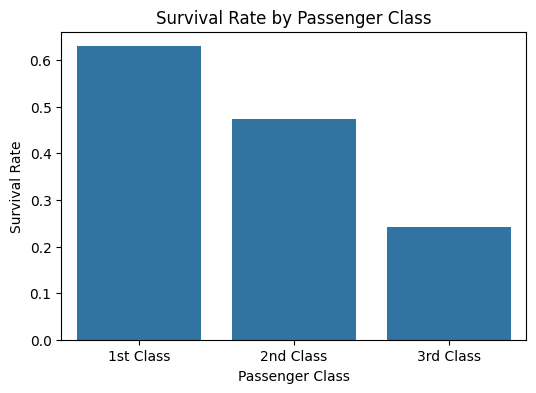

In [21]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test results: p-value = {p}")

# Interpretation
if p < 0.05:
    print("There is a statistically significant association between Passenger Class and Survival.")
else:
    print("There is NO statistically significant association between Passenger Class and Survival.")

# Visualizing the relationship
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", data=titanic_df, errorbar=None)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks(ticks=[0, 1, 2], labels=["1st Class", "2nd Class", "3rd Class"])
plt.show()

## Maximum Likelihood Estimation (MLE)

### **Likelihood Function for Coin Toss**
Let’s assume we **flip a coin 10 times** and get **7 heads and 3 tails**.

- We model this using a **Bernoulli distribution** with **parameter $p$ (probability of heads)**.
- MLE helps us **estimate $p$**, given the observed data.

---
*REMINDER:*
if $X \sim Bernoulli(p)$ then:
$$
\mathbb{P}(X=1) = p = 1-\mathbb{P}(X=0)
$$
for k possible outcomes:
$$
f(k;p) = p^k(1-p)^{1-k}
$$

---

The likelihood function is:

$$ L(p) = P(\text{Data} | p) = p^7 (1 - p)^3 $$

To find the best estimate for $p$, we take the **log-likelihood** and differentiate:

$$ \log L(p) = 7 \log p + 3 \log (1 - p) $$

Solving $\frac{d}{dp} \log L(p) = 0$ gives:

$$ \hat{p} = \frac{\text{Number of Heads}}{\text{Total Flips}} = \frac{7}{10} = 0.7 $$

### **Python Implementation**

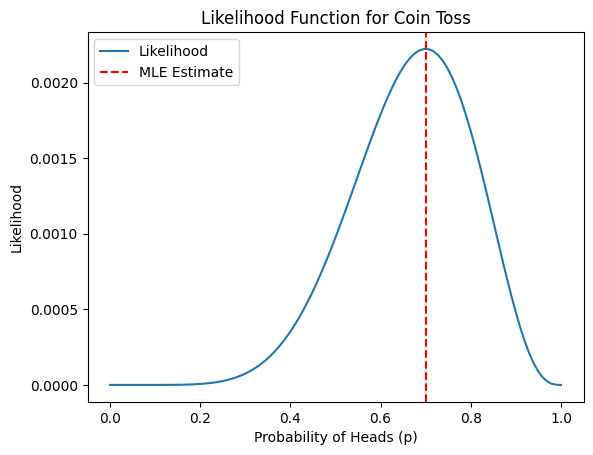

In [22]:
import numpy as np

# Define the likelihood function for coin flips
def likelihood(p, heads, flips):
    return (p ** heads) * ((1 - p) ** (flips - heads))

# Define observed data
heads, flips = 7, 10
p_values = np.linspace(0, 1, 100)
likelihood_values = [likelihood(p, heads, flips) for p in p_values]

# Plot likelihood function
plt.plot(p_values, likelihood_values, label="Likelihood")
plt.axvline(x=0.7, color='r', linestyle='--', label='MLE Estimate')
plt.xlabel("Probability of Heads (p)")
plt.ylabel("Likelihood")
plt.title("Likelihood Function for Coin Toss")
plt.legend()
plt.show()

## Minimizing the Negative Log-Likelihood for MLE

### Why Minimize the Negative Log-Likelihood?
- The **likelihood function** is typically a **product** of probabilities, which can be very small and difficult to work with numerically.
- Taking the **log** of the likelihood function converts it into a **sum** instead of a product, making calculations easier.
- Since we **maximize the likelihood**, we can equivalently **minimize the negative log-likelihood (NLL)**.

---

### Example: MLE for Exponential Distribution
For an **exponential distribution** with parameter $\lambda$, the probability density function (PDF) is:

$$ f(x | \lambda) = \lambda e^{-\lambda x} $$

For a dataset $\{x_1, x_2, ..., x_n\}$, the **log-likelihood function** is:

$$ \log L(\lambda) = \sum_{i=1}^{n} \log (\lambda e^{-\lambda x_i}) $$

Expanding:

$$ \log L(\lambda) = n \log \lambda - \lambda \sum x_i $$

The **negative log-likelihood (NLL)** to minimize:

$$ -\log L(\lambda) = -n \log \lambda + \lambda \sum x_i $$

To find $\lambda$, we take the derivative and set it to zero:

$$ \frac{d}{d\lambda} (-\log L) = -\frac{n}{\lambda} + \sum x_i = 0 $$

Solving for $\lambda$:

$$ \hat{\lambda} = \frac{n}{\sum x_i} = \frac{1}{\bar{x}} $$

Thus, the **MLE estimate** for $\lambda$ in an **exponential distribution** is **the reciprocal of the sample mean**.



In [23]:
# Generate sample data from an exponential distribution
np.random.seed(42)
data = np.random.exponential(scale=2, size=100)  # scale = 1/lambda

# Define the negative log-likelihood function and its gradient
def negative_log_likelihood(lmbda, data):
    return -np.sum(np.log(lmbda * np.exp(-lmbda * data)))

def gradient(lmbda, data):
    return -len(data) / lmbda + np.sum(data)

# Gradient Descent Implementation
lmbda = 0.2  # Initial guess
learning_rate = 0.001
iterations = 100

for _ in range(iterations):
    lmbda -= learning_rate * gradient(lmbda, data)
    if lmbda <= 0:
        lmbda = 0.001

# Compare with theoretical MLE
lambda_mle_gradient = lmbda
lambda_mle_analytical = 1 / np.mean(data)

print(f"MLE Estimate using Gradient Descent: {lambda_mle_gradient:.6f}")
print(f"MLE Estimate using Analytical Solution: {lambda_mle_analytical:.6f}")

MLE Estimate using Gradient Descent: 0.546599
MLE Estimate using Analytical Solution: 0.546599
